In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 48.5 MB/s eta 0:00:00


In [56]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
from tqdm import tqdm_notebook
%matplotlib inline

# 📍 순방향 연산

In [6]:
# 데이터 준비
X = np.array([
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])

In [102]:
# sigmoid 함수
def sigmoid(x):
  return 1.0 / (1.0 + np.exp(-x))

In [8]:
# 가중치
W = 2*np.random.random((1, 3)) - 1
W

array([[0.93867137, 0.48722484, 0.64285491]])

In [9]:
# 추론 결과
N = 4

for k in range(N):
  x = X[k, :].T
  v = np.matmul(W, x)
  y = sigmoid(v)

  print(v)

[0.64285491]
[1.13007975]
[1.58152628]
[2.06875112]


## 🔌 AND

In [11]:
# 데이터 준비
X = np.array([
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])

D = np.array([[0], [0], [1], [1]])

In [12]:
# 모델의 출력을 계산하는 함수
def calc_output(W, x):
  v = np.matmul(W, x)
  y = sigmoid(v)

  return y

In [13]:
# 오차 계산
def calc_error(d, y):
  e = d - y
  delta = y * (1 - y) * e

  return delta

In [14]:
# 시그모이드의 미분
import sympy as sym

z = sym.Symbol("z")
s = 1 / (1 + sym.exp(-z))

sym.diff(s)

exp(-z)/(1 + exp(-z))**2

In [18]:
# 한 epoch에 수행되는 w의 계산
def delta_GD(W, X, D, alpha):
  for k in range(4):
    x = X[k, :].T
    d = D[k]

    y = calc_output(W, x)
    delta = calc_error(d, y)

    dW = alpha * delta * x
    W = W + dW

  return W

In [ ]:
# 가중치를 랜던하게 초기화하고 학습
W = 2*np.random.random((1, 3)) - 1
alpha = 0.9

for epoch in range(10000):
  W = delta_GD(W, X, D, alpha)
  print(W)

In [20]:
# 결과 확인
N = 4
for k in range(N):
  x = X[k, :].T
  v = np.matmul(W, x)
  y = sigmoid(v)
  print(y)



[0.01020028]
[0.0082953]
[0.99324105]
[0.99168593]


## 🔌 XOR

In [21]:
X = np.array([
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])

D = np.array([[0], [1], [1], [0]])
W = 2*np.random.random((1, 3)) - 1

In [22]:
# 학습
alpha = 0.9

for each in range(10000): #train
  W = delta_GD(W, X, D, alpha)

In [23]:
# 결과 확인 -> 엉망
N = 4
for k in range(N):
  x = X[k, :].T
  v = np.matmul(W, x)
  y = sigmoid(v)

  print(y)

[0.52965337]
[0.5]
[0.47034663]
[0.44090112]


# 📍 역전파

In [37]:
# output 계산 함수

def calc_output(W1, W2, x):
  v1 = np.matmul(W1, x)
  y1 = sigmoid(v1)
  v = np.matmul(W2, y1)
  y = sigmoid(v)

  return y, y1

In [38]:
# 출력층의 델타 계산
def calc_delta(d, y):
  e = d - y
  delta = y*(1-y) * e

  return delta

In [39]:
# 은닉층의 델타 계산
def calc_delta1(W2, delta, y1):
  e1 = np.matmul(W2.T, delta)
  delta1 = y1*(1-y1) * e1

  return delta1

In [40]:
# 역전파
def backprop_XOR(W1, W2, X, D, alpha):
  for k in range(4):
    x = X[k, :].T
    d = D[k]

    y, y1 = calc_output(W1, W2, x)
    delta = calc_delta(d, y)
    delta1 = calc_delta1(W2, delta, y1)

    dW1 = (alpha*delta1).reshape(4, 1) * x.reshape(1, 3)
    W1 = W1 + dW1

    dW2 = alpah * delta * y1
    W2 = W2 + dW2

    return W1, W2

In [41]:
X = np.array([
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])

D = np.array([[0], [1], [1], [0]])

W1 = 2*np.random.random((4, 3)) - 1
W2 = 2*np.random.random((1, 4)) - 1

In [42]:
# 학습
alpha = 0.9

for epoch in range(10000):
  W1 , W2 = backprop_XOR(W1, W2, X, D, alpha)

In [43]:
N = 4
for k in range(N):
  x = X[k, :].T
  v1 = np.matmul(W1, x)
  y1 = sigmoid(v1)
  v = np.matmul(W2, y1)
  y = sigmoid(v)

  print(y)

[0.005279]
[0.00235843]
[0.00352546]
[0.00199763]


# 📍cross entropy

In [50]:
# cross_entropy의 델타
def calcDelta_ce(d, y):
  delta = d - y

  return delta

In [51]:
# 은닉층
def calcDelta1_ce(W2, delta, y1):
  e1 = np.matmul(W2.T, delta)
  delta1 = y1*(1 - y1) * e1

  return delta1

In [52]:
# 다시 역전파
def BackpropCE(W1, W2, X, D, alpha):
  for k in range(4):
    x = X[k, :].T
    d = D[k]

    y, y1 = calc_output(W1, W2, x)
    delta = calcDelta_ce(d, y)
    delta1 = calcDelta1_ce(W2, delta, y1)

    dW1 = (alpha*delta1).reshape(4, 1) * x.reshape(1, 3)
    W1 = W1 + dW1

    dW2 = alpha * delta * y1
    W2 = W2 + dW2

  return W1, W2

In [53]:
# 학습
W1 = 2*np.random.random((4, 3)) - 1
W2 = 2*np.random.random((1, 4)) - 1

alpha = 0.0
for epoch in range(10000):
  W1, W2 = BackpropCE(W1, W2, X, D, alpha)

In [55]:
# 결과
N = 4
for k in range(N):
  x = X[k, :].T
  v1 = np.matmul(W1, x)
  y1 = sigmoid(v1)
  v = np.matmul(W2, y1)
  y = sigmoid(v)

  print(y)

[0.4531421]
[0.38376933]
[0.52366603]
[0.43801823]


# 📍 숫자 맞추기

In [82]:
# softmax
def Softmax(x):
  x = np.subtract(x, np.max(x)) # prevent overflow
  ex = np.exp(x)

  return ex / np.sum(ex)

In [83]:
# 훈련용 데이터
X = np.zeros((5, 5, 5))

X[:, :, 0] = [[0, 1, 1, 0, 0], [0, 0, 1, 0, 0], [0, 0, 1, 0, 0], [0, 0, 1, 0, 0], [0, 1, 1, 1, 0]]
X[:, :, 1] = [[1, 1, 1, 1, 0], [0, 0, 0, 0, 1], [0, 1, 1, 1, 0], [1, 0, 0, 0, 0], [1, 1, 1, 1, 1]]
X[:, :, 2] = [[1, 1, 1, 1, 0], [0, 0, 0, 0, 1], [0, 1, 1, 1, 0], [0, 0, 0, 0, 1], [1, 1, 1, 1, 0]]
X[:, :, 3] = [[0, 0, 0, 1, 0], [0, 0, 1, 1, 0], [0, 1, 0, 1, 0], [1, 1, 1, 1, 1], [0, 0, 0, 1, 0]]
X[:, :, 4] = [[1, 1, 1, 1, 1], [1, 0, 0, 0, 0], [1, 1, 1, 1, 0], [0, 0, 0, 0, 1], [1, 1, 1, 1, 0]]

D = np.array([[[1, 0, 0, 0, 0]], [[0, 1, 0, 0, 0]], [[0, 0, 1, 0, 0]], [[0, 0, 0, 1, 0]], [[0, 0, 0, 0, 1]]])

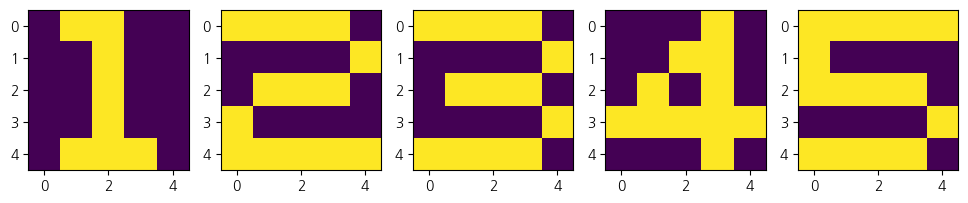

In [84]:
plt.figure(figsize=(12, 4))

for n in range(5):
  plt.subplot(1, 5, n+1)
  plt.imshow(X[:, :, n])

plt.show()

In [85]:
# ReLU
def ReLU(x):
  return np.maximum(0, x)

In [86]:
# ReLU를 이용한 정방향 계산
def calcOutput_ReLU(W1, W2, W3, W4, x):
  v1 = np.matmul(W1, x)
  y1 = ReLU(v1)
  v2 = np.matmul(W2, y1)
  y2 = ReLU(v2)
  v3 = np.matmul(W3, y2)
  y3 = ReLU(v3)
  v = np.matmul(W4, y3)
  y = Softmax(v)

  return y, v1, v2, v3, y1, y2, y3

In [87]:
# 역전파
def backpropagation_ReLU(d, y, W2, W3, W4, v1, v2, v3):
  e = d - y
  delta = e

  e3 = np.matmul(W4.T, delta)
  delta3 = (v3 > 0) * e3

  e2 = np.matmul(W3.T, delta3)
  delta2 = (v2 > 0) * e2

  e1 = np.matmul(W2.T, delta2)
  delta1 = (v1 > 0) * e1

  return delta, delta1, delta2, delta3

In [88]:
# 가중치 계산
def calcWs(alpha, delta, delta1, delta2, delta3, y1, y2, y3, x, W1, W2, W3, W4):
  dW4 = alpha * delta * y3.T
  W4 = W4 + dW4

  dW3 = alpha * delta3 * y2.T
  W3 = W2 + dW3

  dW2 = alpha * delta2 * y1.T
  W2 = W2 + dW2

  dW1 = alpha * delta1 * x.T
  W1 = W1 + dW1

  return W1, W2, W3, W4

In [89]:
# 가중치 업데이트
def DeepReLU(W1, W2, W3, W4, X, D, alpha):
  for k in range(5):
    x = np.reshape(X[:, :, k], (25, 1))
    d = D[k, :].T

    y, v1, v2, v3, y1, y2, y3 = calcOutput_ReLU(W1, W2, W3, W4, x)
    delta, delta1, delta2, delta3 = backpropagation_ReLU(d, y, W2, W3, W4, v1, v2, v3)
    W1, W2, W3, W4 = calcWs(alpha, delta, delta1, delta2, delta3, y1, y2, y3, x, W1, W2, W3, W4)

  return W1, W2, W3, W4

In [90]:
# 학습
W1 = 2*np.random.random((20, 25)) - 1
W2 = 2*np.random.random((20, 20)) - 1
W3 = 2*np.random.random((20, 20)) - 1
W4 = 2*np.random.random((5, 20)) - 1

alpha = 0.01
for epoch in tqdm_notebook(range(10000)):
  W1, W2, W3, W4 = DeepReLU(W1, W2, W3, W4, X, D, alpha)

<ipython-input-90-6f4e3229f125>:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(10000)):


  0%|          | 0/10000 [00:00<?, ?it/s]

In [91]:
# 훈련 데이터 검증
def verify_algorithm(x, W1, W2, W3, W4):
  v1 = np.matmul(W1, x)
  y1 = ReLU(v1)

  v2 = np.matmul(W2, y1)
  y2 = ReLU(v2)

  v3 = np.matmul(W3, y2)
  y3 = ReLU(v3)

  v = np.matmul(W4, y3)
  y = Softmax(v)

  return y

In [92]:
# 결과
N = 5
for k in range(N):
  x = np.reshape(X[:, :, k], (25, 1))

  y = verify_algorithm(x, W1, W2, W3, W4)

  print("Y = {}:".format(k+1))
  print(np.argmax(y, axis=0)+1)
  print(y)
  print("-"*20)

Y = 1:
[1]
[[9.99949189e-01]
 [3.04436742e-05]
 [1.20145134e-08]
 [1.96692655e-05]
 [6.86518799e-07]]
--------------------
Y = 2:
[2]
[[2.36056648e-05]
 [9.99950052e-01]
 [2.59068392e-05]
 [8.44106452e-10]
 [4.34639066e-07]]
--------------------
Y = 3:
[3]
[[2.64014150e-08]
 [2.23299836e-05]
 [9.99954841e-01]
 [1.17639013e-05]
 [1.10386715e-05]]
--------------------
Y = 4:
[4]
[[1.60298994e-05]
 [2.02268057e-14]
 [3.87584181e-06]
 [9.99964395e-01]
 [1.56988854e-05]]
--------------------
Y = 5:
[5]
[[7.63400847e-08]
 [1.37526483e-13]
 [1.90021047e-05]
 [4.60193960e-06]
 [9.99976320e-01]]
--------------------


In [93]:
# 테스트 데이터
X_test = np.zeros((5, 5, 5))

X_test[:, :, 0] = [[0, 0, 0, 0, 0], [0, 1, 0, 0, 0], [1, 0, 1, 0, 0], [0, 0, 1, 0, 0], [0, 1, 1, 1, 0]]
X_test[:, :, 1] = [[1, 1, 1, 1, 0], [0, 0, 0, 0, 0], [0, 1, 1, 1, 0], [0, 0, 0, 0, 1], [1, 1, 1, 1, 0]]
X_test[:, :, 2] = [[0, 0, 0, 1, 0], [0, 0, 1, 1, 0], [0, 1, 0, 0, 0], [1, 1, 1, 0, 1], [0, 0, 0, 1, 0]]
X_test[:, :, 3] = [[1, 1, 1, 1, 0], [0, 0, 0, 0, 1], [0, 1, 1, 1, 0], [1, 0, 0, 0, 0], [1, 1, 1, 0, 0]]
X_test[:, :, 4] = [[0, 1, 1, 1, 1], [1, 1, 0, 0, 0], [1, 1, 1, 1, 0], [0, 0, 0, 1, 1], [1, 1, 1, 1, 0]]

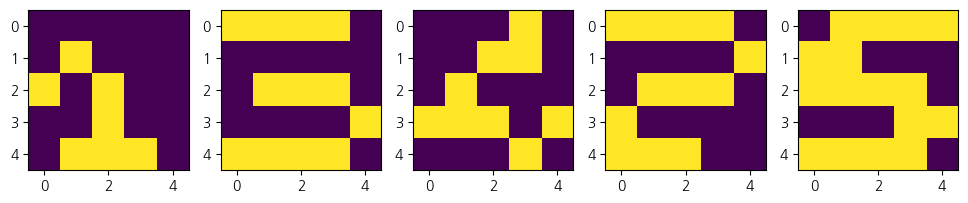

In [94]:
plt.figure(figsize=(12, 4))

for n in range(5):
  plt.subplot(1, 5, n+1)
  plt.imshow(X_test[:, :, n])

plt.show()

In [95]:
# 테스트
learning_result = [0, 0, 0, 0, 0]
for k in range(5):
  x = np.reshape(X_test[:, :, k], (25, 1))

  y = verify_algorithm(x, W1, W2, W3, W4)

  learning_result[k] = np.argmax(y, axis=0)+1

  print("Y = {}:".format(k+1))
  print(np.argmax(y, axis=0)+1)
  print(y)
  print("="*20)

Y = 1:
[1]
[[0.81695991]
 [0.01776784]
 [0.0147151 ]
 [0.14365823]
 [0.00689891]]
Y = 2:
[3]
[[3.19575968e-04]
 [1.34499758e-01]
 [7.88624311e-01]
 [3.77162932e-05]
 [7.65186379e-02]]
Y = 3:
[4]
[[6.07554717e-02]
 [6.05917884e-09]
 [1.33619492e-04]
 [9.27711071e-01]
 [1.13998314e-02]]
Y = 4:
[3]
[[5.71159839e-06]
 [1.38558884e-01]
 [8.61392391e-01]
 [1.20350541e-06]
 [4.18094848e-05]]
Y = 5:
[5]
[[3.11443117e-05]
 [1.31836100e-10]
 [1.68714431e-04]
 [1.97461045e-03]
 [9.97825531e-01]]


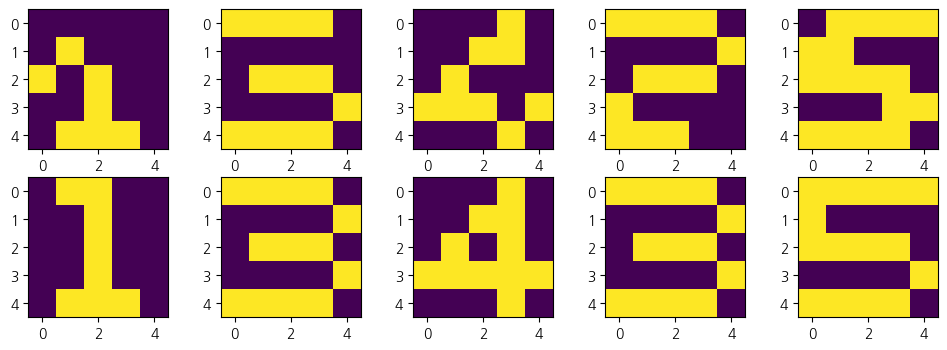

In [96]:
plt.figure(figsize=(12, 4))

for k in range(N):
  plt.subplot(2, 5, k+1)
  plt.imshow(X_test[:, :, k])
  plt.subplot(2, 5, k+6)
  plt.imshow(X[:, :, learning_result[k][0]-1])

plt.show()

In [107]:
# dropout 함수 생성
def Dropout(y, ratio):
  ym = np.zeros_like(y)

  num = round(y.size * (1-ratio))
  idx = np.random.choice(y.size, num, replace=False)
  ym[idx] = 1.0 / (1.0 - ratio)

  return ym

In [109]:
# dropout 적용
def calcOutput_Dropout(W1, W2, W3, W4, x):
  v1 = np.matmul(W1, x)
  y1 = sigmoid(v1)
  y1 = y1*Dropout(y1, 0.2)

  v2 = np.matmul(W2, y1)
  y2 = sigmoid(v2)
  y2 = y2*Dropout(y2, 0.2)

  v3 = np.matmul(W3, y2)
  y3 = sigmoid(v3)
  y3 = y3*Dropout(y3, 0.2)

  v = np.matmul(W4, y3)
  y = Softmax(v)

  return y, y1, y2, y3, v1, v2, v3

In [104]:
# 역전파로 델타를 계산
def backpropagation_Dropout(d, y, y1, y2, y3, W2, W3, W4, v1, v2, v3):
  e = d - y
  delta = e

  e3 = np.matmul(W4.T, delta)
  delta3 = y3*(1-y3) * e3

  e2 = np.matmul(W3.T, delta3)
  delta2 = y2*(1-y2) * e2

  e1 = np.matmul(W2.T, delta2)
  delta1 = y1*(1-y1) * e1

  return delta, delta1, delta2, delta3

In [105]:
# dropout 적용해서 다시 계산
def DeepDropout(W1, W2, W3, W4, X, D):
  for k in range(5):
    x = np.reshape(X[:, :, k], (25, 1))
    d = D[k, :].T

    y, y1, y2, y3, v1, v2, v3 = calcOutput_Dropout(W1, W2, W3, W4, x)
    delta, delta1, delta2, delta3 = backpropagation_Dropout(d, y, y1, y2, y3, W2, W3, W4, v1, v2, v3)
    W1, W2, W3, W4 = calcWs(alpha, delta, delta1, delta2, delta3, y1, y2, y3, x, W1, W2, W3, W4)

  return W1, W2, W3, W4

In [110]:
# 다시 학습
W1 = 2*np.random.random((20, 25)) - 1
W2 = 2*np.random.random((20, 20)) - 1
W3 = 2*np.random.random((20, 20)) - 1
W4 = 2*np.random.random((5, 20)) - 1

for epoch in tqdm_notebook(range(10000)):
  W1, W2, W3, W4 = DeepDropout(W1, W2, W3, W4, X, D)

<ipython-input-110-1d523e0cbaa5>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(10000)):


  0%|          | 0/10000 [00:00<?, ?it/s]

In [111]:
N = 5
for k in range(N):
  x = np.reshape(X_test[:, :, k], (25, 1))

  y = verify_algorithm(x, W1, W2, W3, W4)

  learning_result[k] = np.argmax(y, axis=0)+1

  print("Y = {}:".format(k+1))
  print(np.argmax(y, axis=0)+1)
  print(y)
  print("-"*20)

Y = 1:
[4]
[[1.19102126e-02]
 [1.30345189e-12]
 [8.31129252e-11]
 [9.88089787e-01]
 [1.76478725e-57]]
--------------------
Y = 2:
[1]
[[6.04120393e-01]
 [3.18669002e-08]
 [1.67478479e-07]
 [3.95879408e-01]
 [1.33052623e-48]]
--------------------
Y = 3:
[1]
[[1.00000000e+00]
 [2.74193696e-36]
 [1.80885071e-28]
 [2.13833633e-14]
 [5.46754960e-89]]
--------------------
Y = 4:
[1]
[[9.99998980e-001]
 [5.29218797e-022]
 [4.44000699e-015]
 [1.02043483e-006]
 [9.56810258e-119]]
--------------------
Y = 5:
[1]
[[9.99956551e-01]
 [1.84748936e-22]
 [5.49396848e-15]
 [4.34494805e-05]
 [4.71407173e-42]]
--------------------


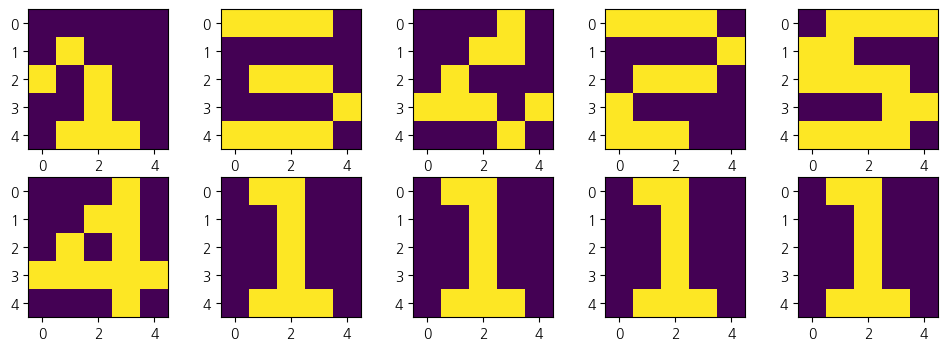

In [112]:
# 결과 확인
plt.figure(figsize=(12, 4))

for k in range(N):
  plt.subplot(2,5, k+1)
  plt.imshow(X_test[:, :, k])
  plt.subplot(2, 5, k+6)
  plt.imshow(X[:, :, learning_result[k][0]-1])

plt.show()

# 📍 MNIST using CNN

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets


mnist = datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255, X_test / 255

X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
model = models.Sequential([
    layers.Conv2D(3 ,kernel_size=(3, 3), strides=(1, 1),
                  padding="same", activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 3)         30        
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 3)         0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 3)         0         
                                                                 
 flatten (Flatten)           (None, 588)               0         
                                                                 
 dense (Dense)               (None, 1000)              589000    
                                                                 
 dense_1 (Dense)             (None, 10)                10010     
                                                        

In [6]:
# 구성한 layers 확인
model.layers

In [11]:
conv = model.layers[0]
conv_weights = conv.weights[0].numpy()

conv_weights.mean(), conv_weights.std()

(-0.091590606, 0.22470166)

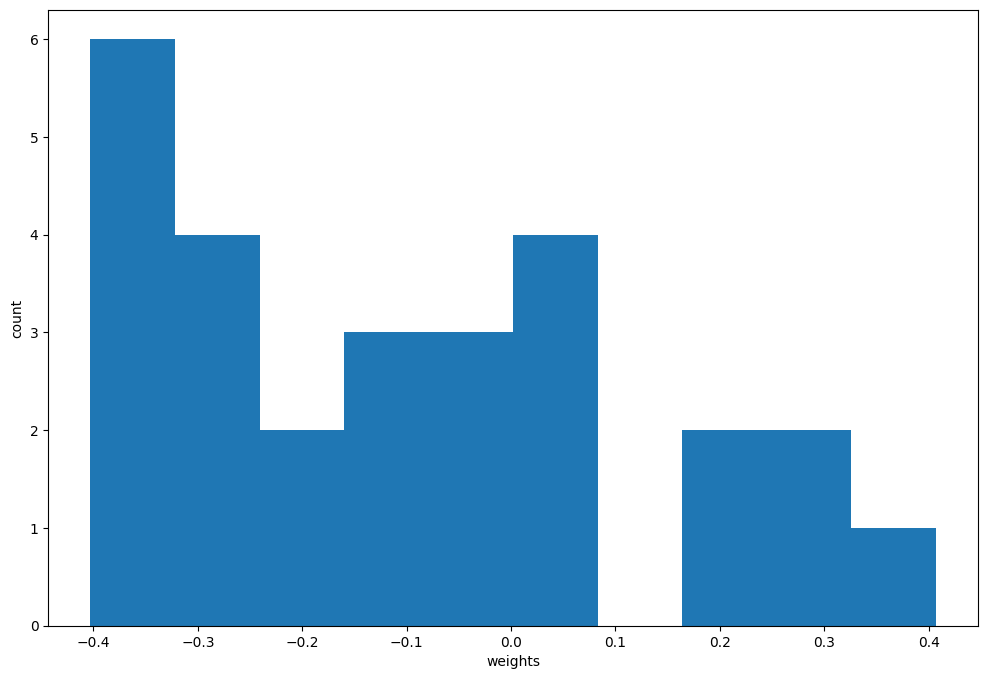

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel("weights")
plt.ylabel("count")
plt.show()

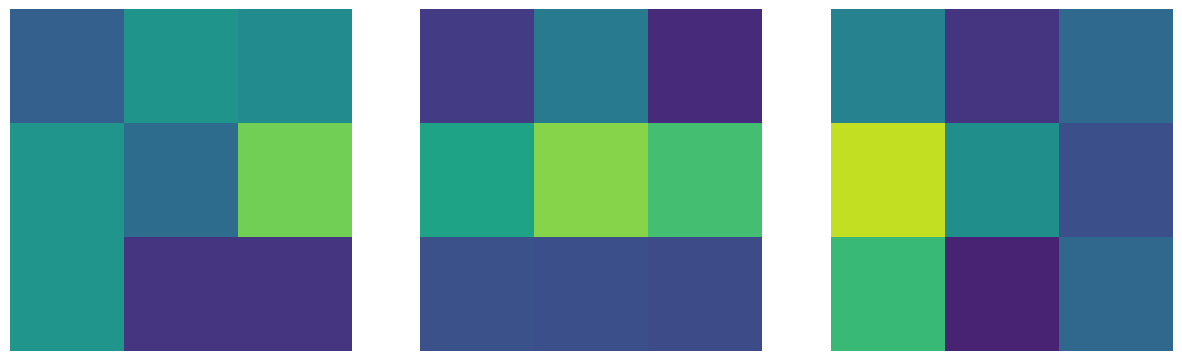

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
  ax[i].imshow(conv_weights[:, :, 0, i], vmin=-0.5, vmax=0.5)
  ax[i].axis("off")

plt.show()

In [23]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")
hist = model.fit(X_train, y_train, epochs=5, verbose=1, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 40s 20ms/step - loss: 0.2565 - accuracy: 0.9219 - val_loss: 0.0899 - val_accuracy: 0.9719
Epoch 2/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1168 - accuracy: 0.9620 - val_loss: 0.0672 - val_accuracy: 0.9786
Epoch 3/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0851 - accuracy: 0.9720 - val_loss: 0.0532 - val_accuracy: 0.9833
Epoch 4/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0662 - accuracy: 0.9782 - val_loss: 0.0527 - val_accuracy: 0.9836
Epoch 5/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0554 - accuracy: 0.9816 - val_loss: 0.0524 - val_accuracy: 0.9832


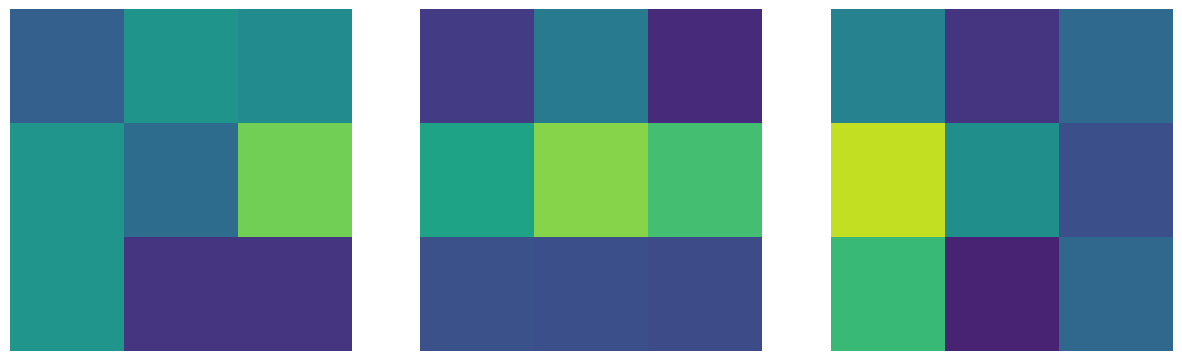

In [24]:
fig, ax = plt.subplots(1,3, figsize=(15, 5))
for i in range(3):
  ax[i].imshow(conv_weights[:, :, 0, i], vmin=-0.5, vmax=0.5),
  ax[i].axis("off")

plt.show()

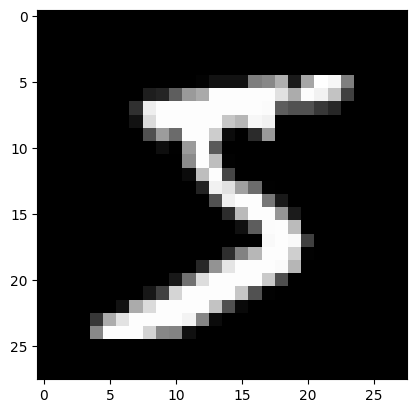

In [25]:
plt.imshow(X_train[0], cmap="gray")

In [28]:
# Conv 레이어에서 출력
inputs = X_train[0].reshape(-1, 28, 28, 1)
conv_layer_output = tf.keras.Model(model.input, model.layers[0].output)
conv_layer_output.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 3)         30        
                                                                 
Total params: 30 (120.00 Byte)
Trainable params: 30 (120.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
# 입력에 대한 feature map
feature_maps = conv_layer_output.predict(inputs)
feature_maps.shape

1/1 [==============================] - 0s 21ms/step


(1, 28, 28, 3)

In [38]:
feature_maps[0, :, :, 0].shape

(28, 28)

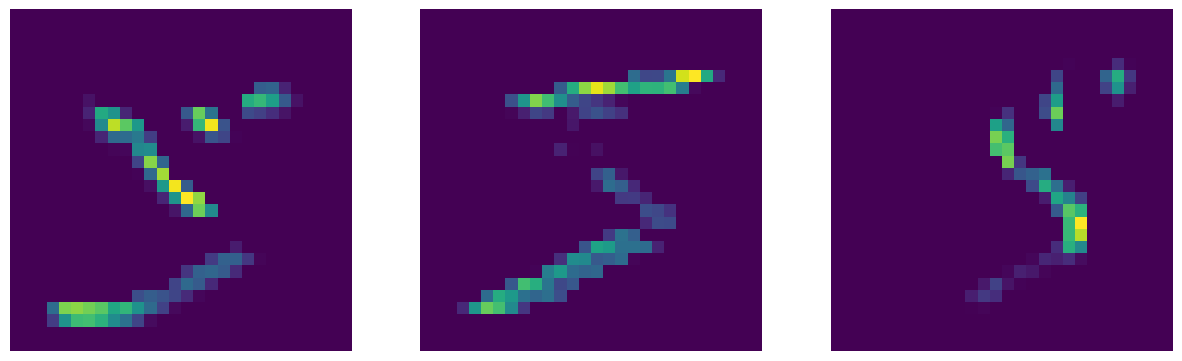

In [40]:
# feature map 이 본 숫자 5
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
  ax[i].imshow(feature_maps[0, :, :, i])
  ax[i].axis("off")

plt.show()

In [41]:
# 전 과정을 함수로 정의
def draw_feature_maps(n):
  inputs = X_train[n].reshape(-1, 28, 28, 1)
  feature_maps = conv_layer_output.predict(inputs)

  fig, ax = plt.subplots(1, 4, figsize=(15, 5))

  ax[0].imshow(inputs[0, :, :, 0], cmap="gray")
  for i in range(1, 4):
    ax[i].imshow(feature_maps[0, :, :, i-1])
    ax[i].axis("off")

  plt.show()

1/1 [==============================] - 0s 42ms/step


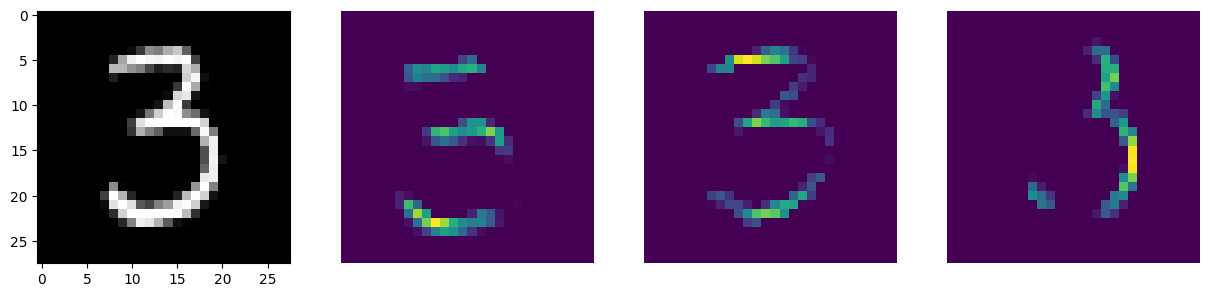

In [42]:
draw_feature_maps(50)

1/1 [==============================] - 0s 39ms/step


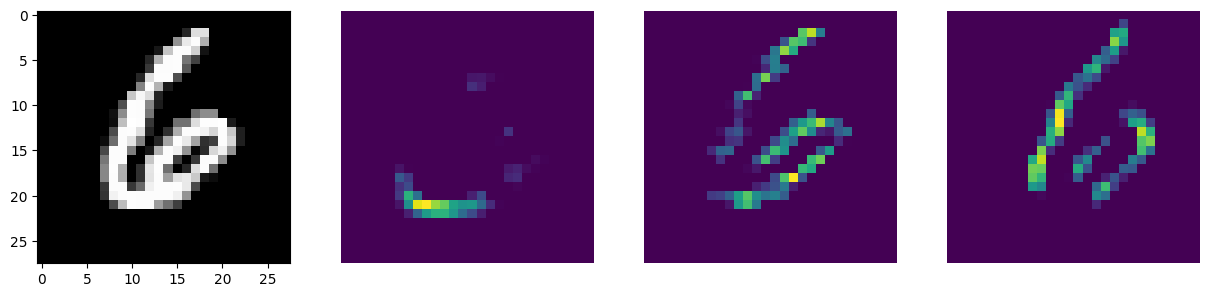

In [43]:
draw_feature_maps(13)